In [125]:
# import sys
# !{sys.executable} -m pip install pylab
import matplotlib.pyplot as plt
import pandas as pd
import glacierml as gl
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
pd.set_option('display.max_columns', None)


ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [2]:
dft = pd.read_csv('aggregated/sermeq_aggregated_bootstrap_predictions.csv')
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()
RGI = gl.RGI_loader(
    
)
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

# drops = RGI[
# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, dft, 
#                left_index = True, right_index = True)
on = [
    'RGIId'
])
ref = ref.rename(columns = {
    'Mean Thickness':'Edasi Mean Thickness'
})

ref['Farinotti Volume'] = (ref['Farinotti Mean Thickness'] / 1e3 )* ref['Area']

ref['region'] = ref['RGIId'].str[6:8]
ref['Edasi Volume'] = (ref['Edasi Mean Thickness'] / 1e3) * ref['Area']
ref['Volume Std Dev'] = (ref['Thickness Std Dev'] / 1e3 )* ref['Area']
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)

ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref = ref.drop_duplicates()
ref = ref.dropna()
# sum(ref['volume km3'])
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0,14.841929,14.226050,7.197743,0.974259,1.721300e-27,8.942386,7.885554,21.626253,14.226050,0.007626,0.005343,0.002591,0.700685
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,1,35.318791,35.053523,5.178314,0.966729,9.273571e-31,5.944721,30.864175,39.845612,35.053523,0.017030,0.019708,0.002889,1.157254
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,2,33.070411,32.592387,4.846715,0.958427,9.373772e-34,5.443084,28.916565,37.291615,32.592387,0.059849,0.055724,0.008167,0.931073
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,3,40.322059,39.819495,5.175665,0.980968,6.835554e-24,6.095077,35.648320,45.116479,39.819495,0.195377,0.148425,0.019052,0.759686
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,4,42.108854,41.651334,5.433712,0.983602,3.243421e-22,6.543149,37.342863,47.168816,41.651334,0.122267,0.108346,0.013981,0.886144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,216454,26.798332,24.811207,13.271253,0.961854,1.399892e-32,17.077573,14.143986,39.744851,24.811207,0.000544,0.001126,0.000557,2.069687
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,216455,37.231512,35.736298,14.775759,0.980468,3.438035e-24,19.285031,23.007389,51.508082,35.736298,0.012981,0.021110,0.008378,1.626249
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,216456,73.363529,71.971468,21.894920,0.992775,3.735962e-14,28.705928,52.045433,94.994497,71.971468,0.250682,0.302111,0.090163,1.205158
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,216457,90.873023,88.635585,25.404969,0.988782,3.084626e-18,33.489690,66.231848,116.174542,88.635585,0.000111,0.001000,0.000279,9.038761


In [3]:
ref['UB'] = (ref['Upper Bound'] / 1e3) * ref['Area']
ref['LB'] = (ref['Lower Bound'] / 1e3) * ref['Area']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF,UB,LB
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0,14.841929,14.226050,7.197743,0.974259,1.721300e-27,8.942386,7.885554,21.626253,14.226050,0.007626,0.005343,0.002591,0.700685,0.007785,0.002839
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,1,35.318791,35.053523,5.178314,0.966729,9.273571e-31,5.944721,30.864175,39.845612,35.053523,0.017030,0.019708,0.002889,1.157254,0.022234,0.017222
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,2,33.070411,32.592387,4.846715,0.958427,9.373772e-34,5.443084,28.916565,37.291615,32.592387,0.059849,0.055724,0.008167,0.931073,0.062836,0.048724
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,3,40.322059,39.819495,5.175665,0.980968,6.835554e-24,6.095077,35.648320,45.116479,39.819495,0.195377,0.148425,0.019052,0.759686,0.166074,0.131221
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,4,42.108854,41.651334,5.433712,0.983602,3.243421e-22,6.543149,37.342863,47.168816,41.651334,0.122267,0.108346,0.013981,0.886144,0.121365,0.096083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,216454,26.798332,24.811207,13.271253,0.961854,1.399892e-32,17.077573,14.143986,39.744851,24.811207,0.000544,0.001126,0.000557,2.069687,0.001669,0.000594
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,216455,37.231512,35.736298,14.775759,0.980468,3.438035e-24,19.285031,23.007389,51.508082,35.736298,0.012981,0.021110,0.008378,1.626249,0.029205,0.013045
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,216456,73.363529,71.971468,21.894920,0.992775,3.735962e-14,28.705928,52.045433,94.994497,71.971468,0.250682,0.302111,0.090163,1.205158,0.391187,0.214323
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,216457,90.873023,88.635585,25.404969,0.988782,3.084626e-18,33.489690,66.231848,116.174542,88.635585,0.000111,0.001000,0.000279,9.038761,0.001278,0.000729


In [4]:
vol_f = ref['Farinotti Volume']
vol_e = ref['Edasi Volume']

data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']

x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

# Calculate the point density
xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

z = gaussian_kde(xy)(xy)

In [5]:
bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)

In [111]:
from matplotlib import ticker

Drawing scatter plot...
Drawing done
Setting scales and labels...
Saving....


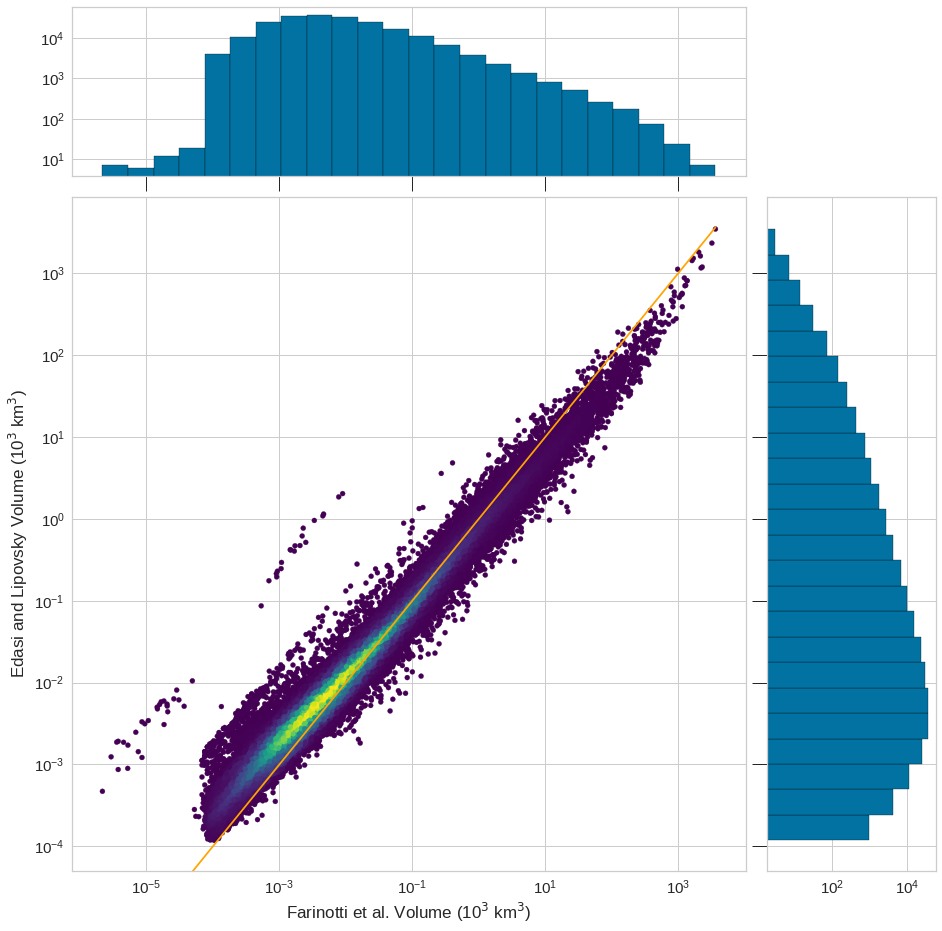

In [115]:
def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 15)
    ax_histy.tick_params(axis="y", labelleft=False, size = 15)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.')
    ax.plot(
        (0,(ref['Farinotti Volume'].max())),
        (0,ref['Farinotti Volume'].max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=15)
    ax_histy.tick_params(axis="y", labelsize=15)

    
fig = plt.figure(figsize=(15,15))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=15)
ax_histy.tick_params(axis="x", labelsize=15)

ax.tick_params(axis="both", labelsize=15)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    ax, 
    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 17)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 17)


print('Saving....')
plt.savefig('figs/scatter/scatter_hist.eps')
plt.savefig('figs/scatter/scatter_hist.svg')

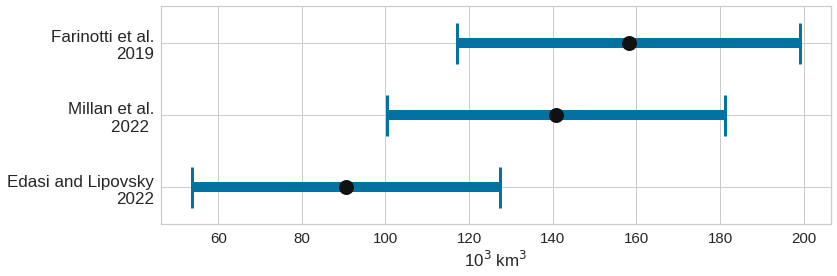

In [90]:

fig, ax = plt.subplots(1,1,figsize = (12, 4))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (90.54894200610966,140.8,158.17)
yr = (36.94737323907368,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'Edasi and Lipovsky\n2022',
     f'Millan et al.\n2022 ',
     f'Farinotti et al.\n2019',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=17)
plt.tick_params(axis='x', which='major', labelsize=15)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10$^3$ km$^3$', fontsize = 17)
plt.grid(visible = True, axis = 'both')
# plt.show()
plt.savefig('figs/err_bars/global.svg')
plt.savefig('figs/err_bars/global.eps')
plt.savefig('figs/err_bars/global.png')

In [8]:
for region in ref['region'].unique():
    dft = ref[ref['region'] == region]
    upper_bound = np.round(
        sum(
        (
            ((dft['Upper Bound'] - dft['Edasi Mean Thickness'])/ 1e3) * dft['Area']
        ) / 1e3), 2
    ) 
    
    lower_bound = np.round(
        sum(
            (
                ((dft['Edasi Mean Thickness'] - dft['Lower Bound'])/ 1e3) * dft['Area']
            ) / 1e3 ), 2
    ) 
    
    print(f'Region: {region}, UB: {upper_bound}, LB: {lower_bound}')

Region: 01, UB: 4.01, LB: 3.98
Region: 02, UB: 0.1, LB: 0.09
Region: 03, UB: 5.34, LB: 5.7
Region: 04, UB: 1.05, LB: 1.13
Region: 05, UB: 3.82, LB: 4.33
Region: 06, UB: 0.58, LB: 0.61
Region: 07, UB: 0.8, LB: 0.83
Region: 08, UB: 0.02, LB: 0.01
Region: 09, UB: 1.45, LB: 1.52
Region: 10, UB: 0.02, LB: 0.02
Region: 11, UB: 0.01, LB: 0.01
Region: 12, UB: 0.01, LB: 0.01
Region: 13, UB: 0.48, LB: 0.47
Region: 14, UB: 0.59, LB: 0.58
Region: 15, UB: 0.14, LB: 0.14
Region: 16, UB: 0.02, LB: 0.02
Region: 17, UB: 0.88, LB: 0.86
Region: 18, UB: 0.03, LB: 0.02
Region: 19, UB: 15.13, LB: 17.49


In [44]:
df_errors = pd.DataFrame({
    'Model':['Farinotti Predicted', 'Farinotti Error',
             'MP2', 'MP1', 'MT1', 'MT2',
             'Edasi Predicted', 'Edasi STD', 'Edasi UB', 'Edasi LB'],
    'RGI region 01':[20.04, 5.19 , 0   , 0   , '*' , '*'  , 14.51, 4.20 , 4.01 , 3.98],
    'RGI region 02':[1.06 , 0.27 , 0   , 0   , '*' , '*'  , 0.74 , 0.11 , 0.1  , 0.09],
    'RGI region 03':[28.33, 7.35 , 25.4, 7.2 , 25.4, 7.2  , 14.22, 5.69 , 5.34 , 5.7],
    'RGI region 04':[8.61 , 2.23 , 7.0 , 2.1 , 7.0 , 2.1  , 3.96 , 1.13 , 1.05 , 1.13],
    'RGI region 05':[15.69, 4.07 , 11.8, 3.7 , 11.8, 3.7  , 19.86, 8.80 , 3.82 , 4.33],
    'RGI region 06':[3.77 , 0.98 , 3.7 , 0.9 , 3.7 , 0.9  , 1.53 , 0.62 , 0.58 , 0.61],
    'RGI region 07':[7.47 , 1.94 , 7.0 , 2.3 , 7.0 , 2.3  , 3.84 , 0.87 , 0.8  , 0.83],
    'RGI region 08':[0.30 , 0.08 , 0.29, 0.1 , 0.29, 0.1  , 0.21 , 0.02 , 0.02 , 0.01],
    'RGI region 09':[14.64, 3.80 , 15.5, 3.9 , 15.5, 3.9  , 5.10 , 1.56 , 1.45 , 1.52],
    'RGI region 10':[0.14 , 0.04 , 0.09, 0.05, 0.09, 0.05 , 0.19 , 0.02 , 0.02 , 0.02],
    'RGI region 11':[0.13 , 0.03 , 0.12, 0.05, 0.12, 0.05 , 0.17 , 0.01 , 0.01 , 0.01],
    'RGI region 12':[0.06 , 0.02 , 0.06, 0.03, 0.06, 0.03 , 0.08 , 0.01 , 0.01 , 0.01],
    'RGI region 13':[3.27 , 0.85 , 0   , 0   , '*' , '*'  , 3.42 , 0.53 , 0.48 , 0.47],
    'RGI region 14':[2.87 , 0.74 , 0   , 0   , '*' , '*'  , 3.23 , 0.64 , 0.59 , 0.58],
    'RGI region 15':[0.88 , 0.23 , 0   , 0   , '*' , '*'  , 1.10 , 0.16 , 0.14 , 0.14],
    'RGI region 16':[0.10 , 0.03 , 0.07, 0.04, 0.07, 0.04 , 0.07 , 0.02 , 0.02 , 0.02],
    'RGI region 17':[5.34 , 1.39 , 5.9 , 1.6 , 5.9 , 1.6  , 3.50 , 0.91 , 0.88 , 0.86],
    'RGI region 18':[0.07 , 0.02 , 0.07, 0.03, 0.07, 0.03 , 0.12 , 0.03 , 0.03 , 0.02],
    'RGI region 19':[46.47, 12.06, 35.1, 9.1 , 35.1, 9.1  , 23.58, 16.20, 15.13, 17.49],
})


df_errors

,Model,RGI region 01,RGI region 02,RGI region 03,RGI region 04,RGI region 05,RGI region 06,RGI region 07,RGI region 08,RGI region 09,RGI region 10,RGI region 11,RGI region 12,RGI region 13,RGI region 14,RGI region 15,RGI region 16,RGI region 17,RGI region 18,RGI region 19
0,Farinotti Predicted,20.04,1.06,28.33,8.61,15.69,3.77,7.47,0.30,14.64,0.14,0.13,0.06,3.27,2.87,0.88,0.10,5.34,0.07,46.47
1,Farinotti Error,5.19,0.27,7.35,2.23,4.07,0.98,1.94,0.08,3.80,0.04,0.03,0.02,0.85,0.74,0.23,0.03,1.39,0.02,12.06
2,MP2,0,0,25.40,7.00,11.80,3.70,7.00,0.29,15.50,0.09,0.12,0.06,0,0,0,0.07,5.90,0.07,35.10
3,MP1,0,0,7.20,2.10,3.70,0.90,2.30,0.10,3.90,0.05,0.05,0.03,0,0,0,0.04,1.60,0.03,9.10
4,MT1,*,*,25.40,7.00,11.80,3.70,7.00,0.29,15.50,0.09,0.12,0.06,*,*,*,0.07,5.90,0.07,35.10
5,MT2,*,*,7.20,2.10,3.70,0.90,2.30,0.10,3.90,0.05,0.05,0.03,*,*,*,0.04,1.60,0.03,9.10
6,Edasi Predicted,14.51,0.74,14.22,3.96,19.86,1.53,3.84,0.21,5.10,0.19,0.17,0.08,3.42,3.23,1.1,0.07,3.50,0.12,23.58
7,Edasi STD,4.2,0.11,5.69,1.13,8.80,0.62,0.87,0.02,1.56,0.02,0.01,0.01,0.53,0.64,0.16,0.02,0.91,0.03,16.20
8,Edasi UB,4.01,0.1,5.34,1.05,3.82,0.58,0.80,0.02,1.45,0.02,0.01,0.01,0.48,0.59,0.14,0.02,0.88,0.03,15.13
9,Edasi LB,3.98,0.09,5.70,1.13,4.33,0.61,0.83,0.01,1.52,0.02,0.01,0.01,0.47,0.58,0.14,0.02,0.86,0.02,17.49


In [45]:
df_errors.T

,0,1,2,3,4,5,6,7,8,9
Model,Farinotti Predicted,Farinotti Error,MP2,MP1,MT1,MT2,Edasi Predicted,Edasi STD,Edasi UB,Edasi LB
RGI region 01,20.04,5.19,0,0,*,*,14.51,4.2,4.01,3.98
RGI region 02,1.06,0.27,0,0,*,*,0.74,0.11,0.1,0.09
RGI region 03,28.33,7.35,25.4,7.2,25.4,7.2,14.22,5.69,5.34,5.7
RGI region 04,8.61,2.23,7.0,2.1,7.0,2.1,3.96,1.13,1.05,1.13
RGI region 05,15.69,4.07,11.8,3.7,11.8,3.7,19.86,8.8,3.82,4.33
RGI region 06,3.77,0.98,3.7,0.9,3.7,0.9,1.53,0.62,0.58,0.61
RGI region 07,7.47,1.94,7.0,2.3,7.0,2.3,3.84,0.87,0.8,0.83
RGI region 08,0.3,0.08,0.29,0.1,0.29,0.1,0.21,0.02,0.02,0.01
RGI region 09,14.64,3.8,15.5,3.9,15.5,3.9,5.1,1.56,1.45,1.52


In [46]:
df_errors_text = df_errors.copy()

100%|██████████| 95/95 [00:00<00:00, 47702.49it/s]
19it [00:00, 2601.84it/s]
19it [00:00, 22.75it/s]


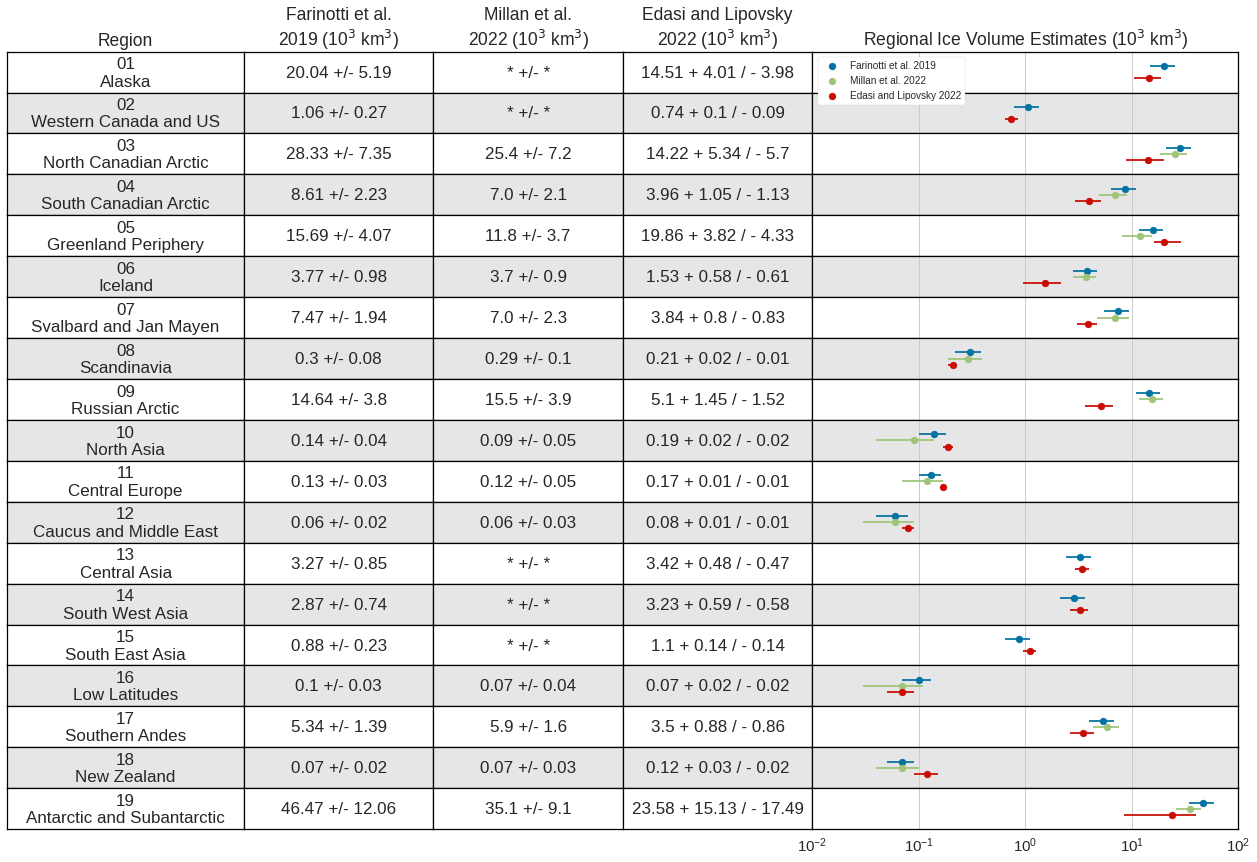

In [158]:
import pylab
col1 = df_errors_text.columns[1:]

fig, axes = plt.subplots(
    ncols=5, nrows=19, figsize=(19,12),
    gridspec_kw={"width_ratios":[5,4,4,4,9]},
    sharex = True, sharey = True,
#     facecolor = '0.8'
                        )
fig.subplots_adjust(.05, 0.05, .95 , 0.95, wspace=0.0001, hspace=0.0001)
    
for ax in tqdm((axes.flatten()[:-1])):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
for ax in tqdm((axes.flatten())):

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

#     for _, s in ax.spines.items():
#         s.set_visible(False)
#         ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
        

# border = fig.add_subplot(111)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")

text_kw = dict(ha = 'center', va = 'bottom', size=17)

region_list = [
    'Alaska',
    'Western Canada and US',
    'North Canadian Arctic',
    'South Canadian Arctic',
    'Greenland Periphery',
    'Iceland',
    'Svalbard and Jan Mayen',
    'Scandinavia',
    'Russian Arctic',
    'North Asia',
    'Central Europe',
    'Caucus and Middle East',
    'Central Asia',
    'South West Asia',
    'South East Asia',
    'Low Latitudes',
    'Southern Andes',
    'New Zealand',
    'Antarctic and Subantarctic'
]
for i, ax in tqdm(enumerate(axes[:,0])):
#     print(i)
    ax.text(
        0.5,
        0.08, 
        col1[i][-2:] + '\n' + region_list[i], 
        transform = ax.transAxes, 
        **text_kw
    )
    
    ax.grid(visible = False)
    
# estimate and error
for i, ax in enumerate(axes[:,1]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[0]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[1] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,2]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[4]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[5] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,3]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[6]) + ' + ' + str(
            df_errors_text[col1[i]].loc[8] ) + ' / - ' + str(
            df_errors_text[col1[i]].loc[9]
        ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
        
#         if n % 2 != 0:
#             ax.set_facecolor('0.8')

labels = [
    'Farinotti et al. 2019',
    'Millan et al. 2022',
    'Edasi and Lipovsky 2022'
]

# colors = ['C0', 'C1', 'C2']

for i, ax in tqdm(enumerate(axes[:,4])):
    #farinoitt est & errors
    x_f = df_errors[col1[i]].iloc[0]
    x_f_err = df_errors[col1[i]].loc[1]
    
    
    # Millan est & errors
    x_m = df_errors[col1[i]].iloc[2]
    
    x_m_err = df_errors[col1[i]].loc[3]
    # Edasi est & errors
    x_e = df_errors[col1[i]].iloc[6]
    x_e_err = [
        [df_errors[col1[i]].iloc[8]],
        [df_errors[col1[i]].iloc[7]]
    ]
    

    ax.scatter(
        x = x_f, 
        y = 1.5,
        c = 'C0',
#         marker = '.',
        alpha = 1,
        label = 'Farinotti et al. 2019'
    )
    ax.scatter(
        x =  x_m, 
        y = 0,
        c = 'C1',
#         marker = '.',
        alpha = 1,
        label = 'Millan et al. 2022'
    )
    ax.scatter(
        x =  x_e, 
        y = -1.5,
        c = 'C2',
#         marker = '.',
        alpha = 1,
        label = 'Edasi and Lipovsky 2022'
    )

    ax.errorbar(
        x = x_f,
        y =  1.5,
        ecolor = 'C0',
#         elinewidth = 0.5,
        xerr = x_f_err,
    )
    ax.errorbar(
        x = x_m ,
        y = 0,
        ecolor = 'C1',
#         elinewidth = 0.5,
        xerr = x_m_err,
    )
    ax.errorbar(
        x = x_e ,
        y = -1.5,
        ecolor = 'C2',
#         elinewidth = 0.5,
        xerr = x_e_err,
    )
    ax.set_xlim((0.01,100))
    ax.set_ylim((-5,5))
    ax.set_xscale('log')
    grid_kw = dict(color = 'black')
#     plt.grid(b=None)

    ax.grid(visible = False,
#             **grid_kw
           )
    ax.xaxis.grid(visible = True)
#     break

# for i, ax in tqdm(enumerate(axes[0,:])):
#     ax.set_title(df_errors['Model'].loc[i])
axes[0,0].set_title(f'Region', fontsize = 17.5,
#                    fontweight = 1000
                   )
axes[0,1].set_title(f'Farinotti et al.\n2019 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,2].set_title('Farinotti\nError')
axes[0,2].set_title(f'Millan et al.\n2022 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,4].set_title('Millan\nError')
axes[0,3].set_title(f'Edasi and Lipovsky\n2022 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,6].set_title('Edasi\nError')
axes[0,4].set_title(f'Regional Ice Volume Estimates (10$^3$ km$^3$)',
                    fontsize = 17.5, 
#                     fontweight = 1000
                   )
plt.xticks(fontsize = 15)


for n in range(0, 19, 1):
    if n % 2 != 0:
        axes[n,0].set_facecolor('0.9')
        axes[n,1].set_facecolor('0.9')
        axes[n,2].set_facecolor('0.9')
        axes[n,3].set_facecolor('0.9')
        axes[n,4].set_facecolor('0.9')
#         axes[n,5].set_facecolor('0.8')
#         axes[n,6].set_facecolor('0.8')
#         axes[n,7].set_facecolor('0.8')

ax.legend(
    labels,
    facecolor = '1',
    framealpha = 1,
    frameon = True,
    bbox_to_anchor=(0.37,19),
)
# plt.tight_layout()
# plt.subplots_adjust(top = 1)
plt.show()

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


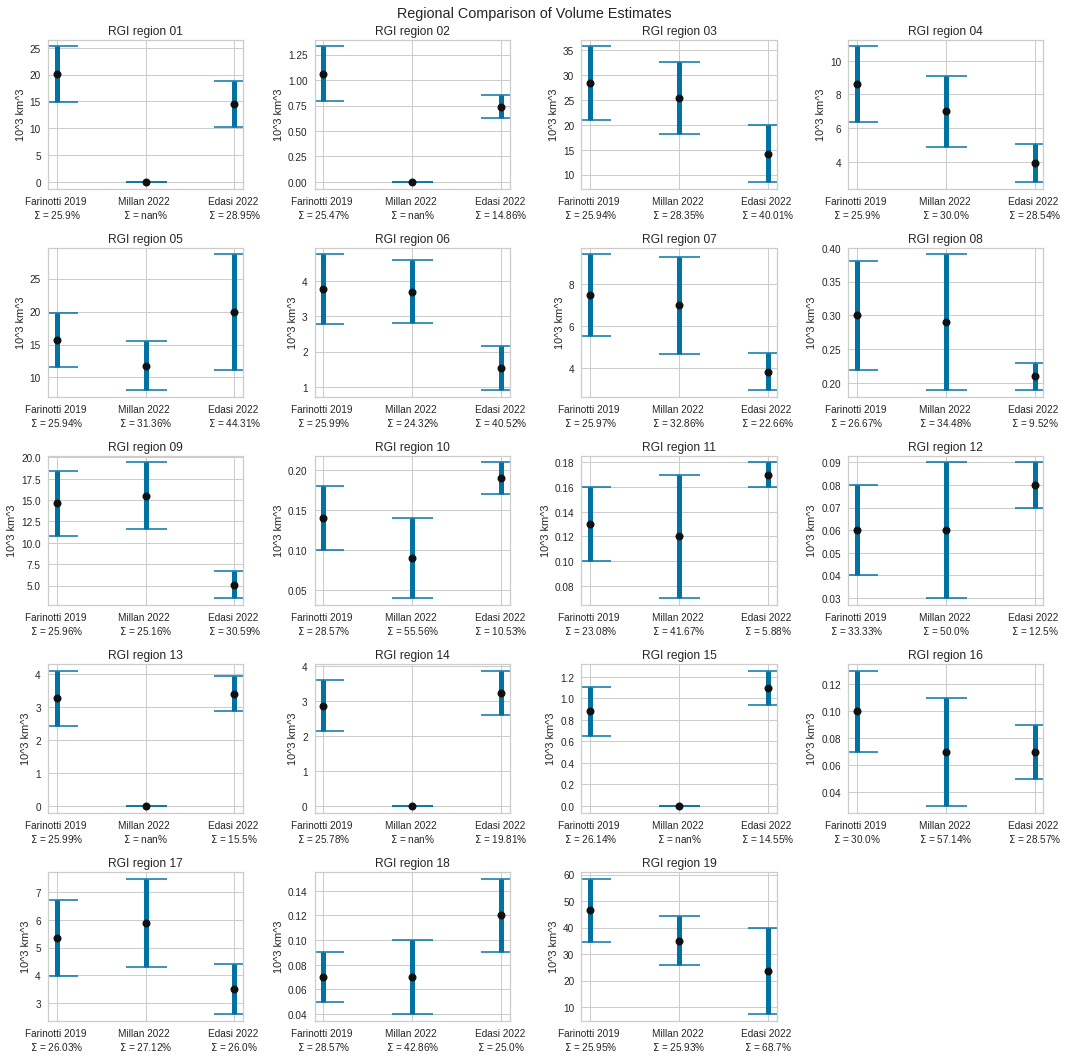

In [18]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
fig.patch.set_facecolor('w')
fig.suptitle('Regional Comparison of Volume Estimates')
             
# print(len(region_list))
for n, region in enumerate(df_errors.columns[1:]): 
#     print(df_errors[region])
    ax = plt.subplot(5,4,n+1)
    ax.set_title(region)
    y = (df_errors[region].loc[0], df_errors[region].loc[2], df_errors[region].loc[4],)
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    
    farinotti_region_sigma = yr[0] / y[0] * 100
    millan_region_sigma = yr[1] / y[1] * 100
    edasi_region_sigma = yr[2] / y[2] * 100

    x = (f'Farinotti 2019 \n$\Sigma$ = {farinotti_region_sigma.round(2)}%',
         f'Millan 2022 \n$\Sigma$ = {millan_region_sigma.round(2)}%', 
         f'Edasi 2022 \n$\Sigma$ = {edasi_region_sigma.round(2)}%')
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    plt.errorbar(x, y, yerr = yr, linestyle='None', 
                 marker='o', markerfacecolor = 'k', markersize = 8, 
                 ecolor = 'b', color = 'k', linewidth = 5, capsize = 20.5, capthick = 1.5
                )

    plt.ylabel('10^3 km^3')
    plt.grid(visible = True, axis = 'both')
    plt.tight_layout()
#     plt.savefig('figs/err_bars/regional.svg')
#     plt.savefig('figs/err_bars/regional.eps')